In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [2]:
#Reading the data
import pandas as pd
file_path = 'Agirlikli.xlsx' 
df = pd.read_excel(file_path)

In [3]:
#Finding the numeric columns and take mean of data for each territory to come up with a territory average for each attribute
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_grouped = df.groupby('Terr')[numeric_columns].mean().reset_index()
df_grouped.to_excel('TerritoryAveraged.xlsx', index=False)

In [4]:
#Selecting numeric attributes from the grouped final territories
columns_to_cluster = df_grouped.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [5]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_grouped[columns_to_cluster])

In [6]:
#Principal Components
from sklearn.decomposition import PCA

pca=PCA(0.95)
principal_Comp = pca.fit_transform(scaled_data)

In [7]:
#Optimal nb of principal components
pca.explained_variance_ratio_

array([1.])

In [14]:
#There are two principal components:
#reduced_df = pd.DataFrame(data = principal_Comp, columns = ['principal component 1' )

In [16]:
#There are two principal components:
reduced_df = pd.DataFrame(data = principal_Comp, columns = ['principal component 1'])

In [ ]:
#kmeans_kwargs = {"init": "random", "n_init":10, "random_state":1}

In [18]:
#Finding the elbow point in a range from 10 to 100
from sklearn.cluster import KMeans

SSE = []
K = range(10, 101) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state = 42, max_iter = 500)
    kmeans.fit(reduced_df)
    SSE.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method For Optimal k')

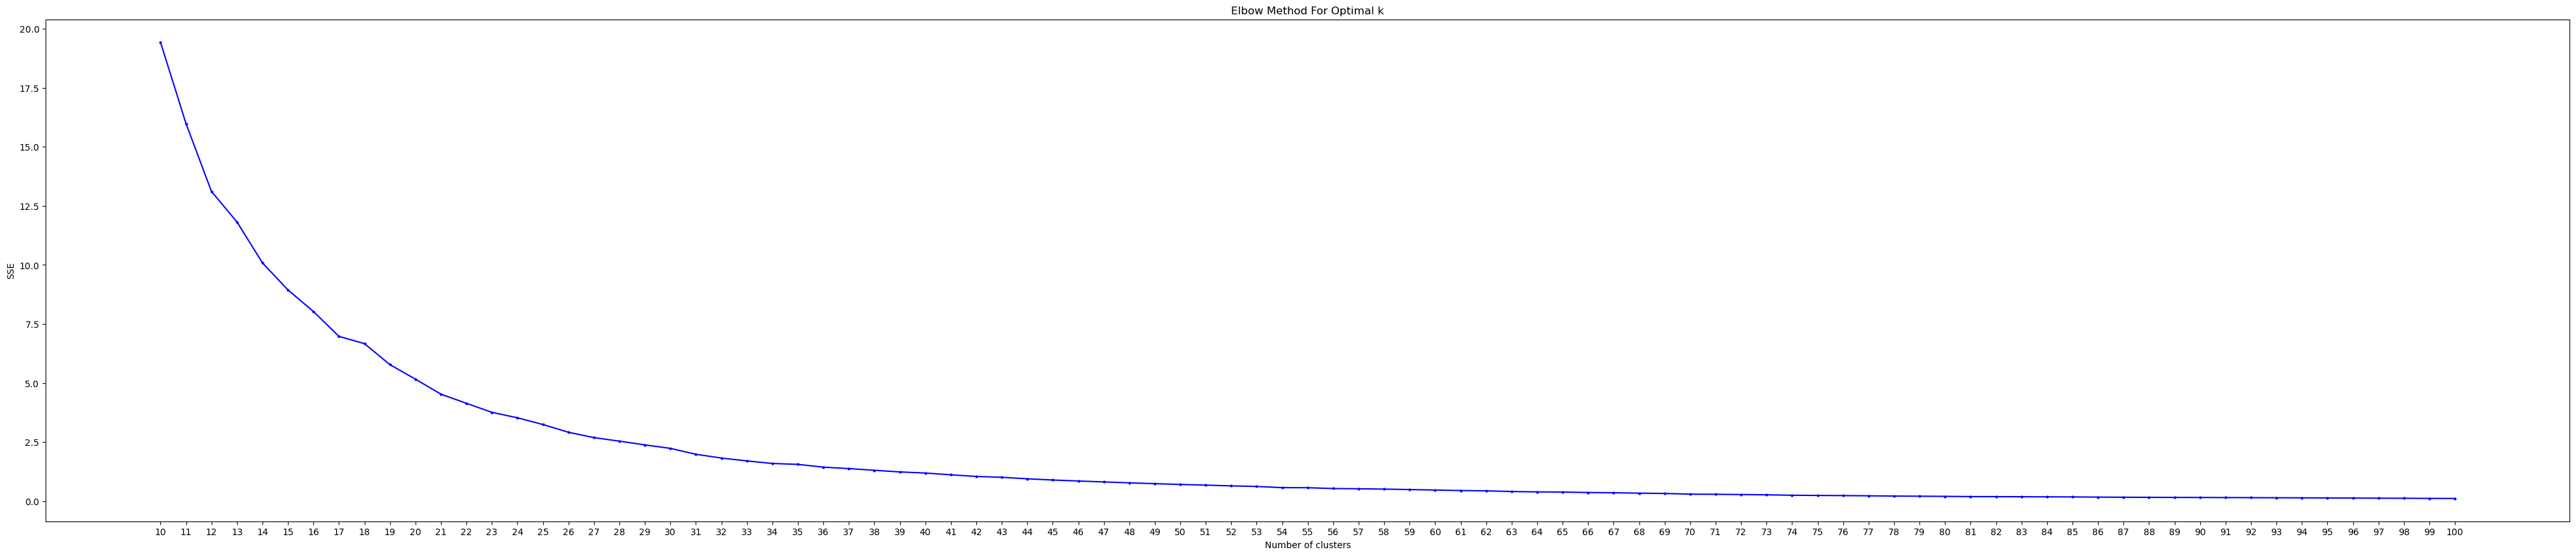

In [20]:
#Plot SSE vs Nb of Clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 10))
plt.plot(K, SSE, 'bo-', markersize=2)
plt.xticks(K)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title("Elbow Method For Optimal k")

In [22]:
#The optimal nb of clusters according to the plot's elbow point:
optimal_k = 24
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(reduced_df)

In [24]:
#Iterating the clusters and territories
for index, row in df_grouped[['Terr', 'Cluster']].iterrows():
    print(f" {int(row['Cluster'])} {row['Terr']},")

 11 TERR010101 - Sarıyer,
 5 TERR010102 - Gazi Mahallesi,
 5 TERR010103 - Sultangazi,
 14 TERR010104 - Cebeci,
 15 TERR010105 - Göktürk,
 14 TERR010106 - Arnavutköy,
 7 TERR010107 - Kayaşehir,
 7 TERR010108 - Başakşehir,
 15 TERR010109 - Mahmutbey,
 10 TERR010110 - Tekstilkent,
 15 TERR010111 - Güneşli,
 2 TERR010112 - Yavuz Selim,
 10 TERR010113 - Bağcılar,
 10 TERR010114 - Menderes,
 15 TERR010115 - Kocasinan,
 2 TERR010116 - Kazım Karabekir,
 2 TERR010117 - Soğanlı,
 20 TERR010118 - Güngören,
 2 TERR010119 - Yenibosna,
 14 TERR010120 - Yunusemre,
 10 TERR010121 - Esenler,
 2 TERR010122 - Otogar,
 15 TERR010123 - Bayrampaşa,
 16 TERR010124 - Hal,
 20 TERR010125 - Gaziosmanpaşa,
 20 TERR010126 - Küçükköy,
 2 TERR010127 - Yıldırım Mah.,
 20 TERR010128 - Karadeniz Mah.,
 20 TERR010129 - Yeşilpınar,
 2 TERR010130 - Alibeyköy,
 4 TERR010131 - TARABYA,
 12 TERR010132 - MASLAK,
 8 TERR010133 - Etiler,
 7 TERR010134 - Sanayi Mah.,
 1 TERR010135 - Levent,
 1 TERR010136 - Mecidiyeköy,
 1 TERR0

In [ ]:
#Writing the clusters to Excel
df_grouped.to_excel('Territories-Cluster.xlsx', index=False)